## Scenario
A healthcare provider initiated an attrition analysis. They wish to know their current attrition rate and, if the rate is greater than ten percent, what are the contributing factors.

## Problem Statement
Are there any outliers affecting retention?

## Takeaways
- Attrition rate is 12%. A decent rate (10% is a common target)

- Youth (statistically significant with notable effect size).
    - Mean age of employed = 37
    - Mean age of attrited = 30

- Tenure
    - 


In [1]:
import decimal
import matplotlib.pyplot as plt
from pathlib import Path
from typing import List, Dict, Tuple, Callable
from math import ceil, sqrt, modf

import pandas as pd
import seaborn as sns
from pandasql import sqldf
from statistics import median, stdev
from statsmodels.stats.weightstats import ztest

import utils

# Import file
filename = 'data/healthcare_attrition.csv'
raw_df = pd.read_csv(Path(utils.root(), filename), sep=',')

empl_pop = raw_df.query("Attrition == 'No'")
attr_pop = raw_df.query("Attrition == 'Yes'")

### Samples
talk about how you got the sizes and got the sample. Used sample size calculator to determine sample size.

In [2]:
def sample(population: pd.DataFrame) -> pd.DataFrame:
    sample_size = 125
    
    sample_ = population.sample(n=sample_size).reset_index(drop=True)
    return sample_

empl_sample = sample(empl_pop)
attr_sample = sample(attr_pop)

# Attrition Rate

In [3]:
total_attrited = attr_pop.shape[0]
total_employees = raw_df.shape[0]

attrition_rate = round(total_attrited / total_employees, 2) * 100
print(f'The attrition rate is approximately {attrition_rate}%')

The attrition rate is approximately 12.0%


# Attrition by Age


BAR CHART
---------------


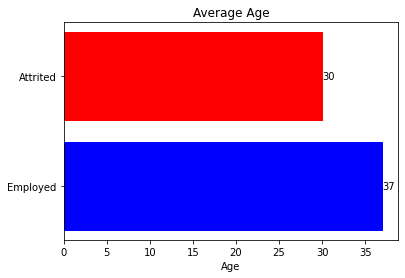


BOX PLOT
---------------


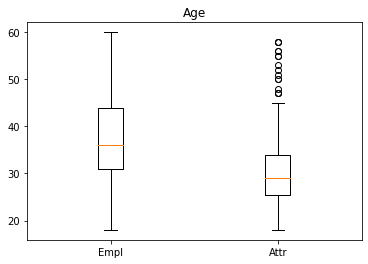


SIGNIFICANCE
---------------
P value of < 0.01 shows High Significance and Cohens of 0.7505 shows a Large effect size.


In [4]:
colname = 'Age'
utils.bar_chart_avg(empl_pop, attr_pop, colname)
utils.box_plot(empl_pop, attr_pop, colname)

pval = utils.pval_unequal_stdev(empl_sample, attr_sample, colname)
cohens = utils.cohens_d(empl_sample, attr_sample, colname)

utils.print_significance(pval, cohens)

# Attrition by Commute


BAR CHART
---------------


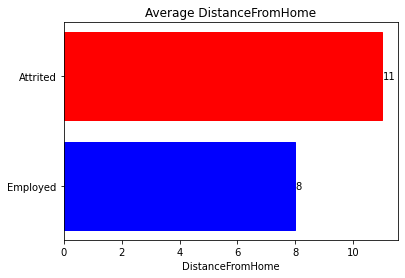


BOX PLOT
---------------


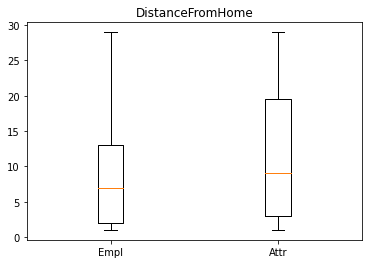


SIGNIFICANCE
---------------
P value of < 0.01 shows High Significance and Cohens of 0.3521 shows a Small effect size.


In [5]:
colname = 'DistanceFromHome'
utils.bar_chart_avg(empl_pop, attr_pop, colname)
utils.box_plot(empl_pop, attr_pop, colname)

pval = utils.pval_unequal_stdev(empl_sample, attr_sample, colname)
cohens = utils.cohens_d(empl_sample, attr_sample, colname)

utils.print_significance(pval, cohens)

# Attrition by Years at Company


BAR CHART
---------------


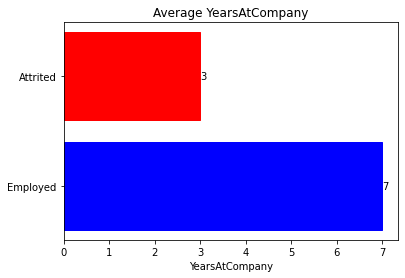


BOX PLOT
---------------


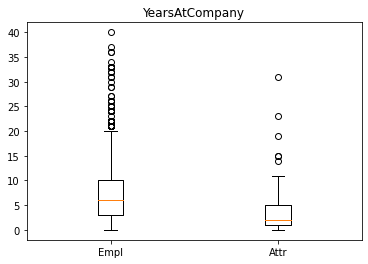


SIGNIFICANCE
---------------
P value of < 0.01 shows High Significance and Cohens of 0.8672 shows a Large effect size.


In [6]:
colname = 'YearsAtCompany'
utils.bar_chart_avg(empl_pop, attr_pop, colname)
utils.box_plot(empl_pop, attr_pop, colname)

pval = utils.pval_unequal_stdev(empl_sample, attr_sample, colname)
cohens = utils.cohens_d(empl_sample, attr_sample, colname)

utils.print_significance(pval, cohens)

# Attrition by Years with Current Manager


BAR CHART
---------------


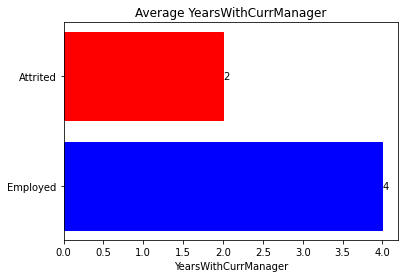


BOX PLOT
---------------


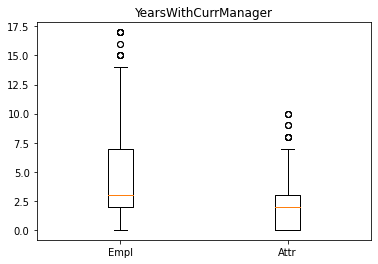


SIGNIFICANCE
---------------
P value of < 0.01 shows High Significance and Cohens of 0.7961 shows a Large effect size.


In [7]:
colname = 'YearsWithCurrManager'
utils.bar_chart_avg(empl_pop, attr_pop, colname)
utils.box_plot(empl_pop, attr_pop, colname)

pval = utils.pval_unequal_stdev(empl_sample, attr_sample, colname)
cohens = utils.cohens_d(empl_sample, attr_sample, colname)

utils.print_significance(pval, cohens)

# Attrition by Years in Current Role


BAR CHART
---------------


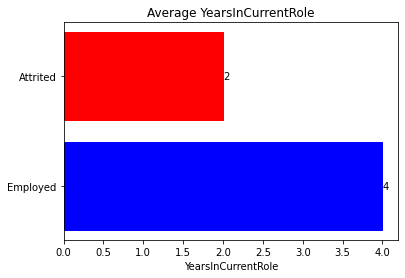


BOX PLOT
---------------


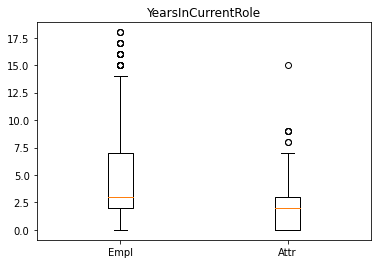


SIGNIFICANCE
---------------
P value of < 0.01 shows High Significance and Cohens of 0.8815 shows a Large effect size.


In [8]:
colname = 'YearsInCurrentRole'
utils.bar_chart_avg(empl_pop, attr_pop, colname)
utils.box_plot(empl_pop, attr_pop, colname)

pval = utils.pval_unequal_stdev(empl_sample, attr_sample, colname)
cohens = utils.cohens_d(empl_sample, attr_sample, colname)

utils.print_significance(pval, cohens)

# Attrition by Total Working Years


BAR CHART
---------------


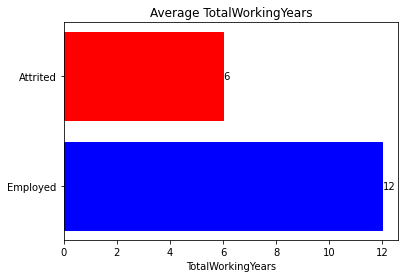


BOX PLOT
---------------


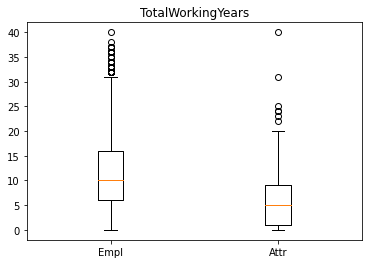


SIGNIFICANCE
---------------
P value of < 0.01 shows High Significance and Cohens of 0.8835 shows a Large effect size.


In [9]:
colname = 'TotalWorkingYears'
utils.bar_chart_avg(empl_pop, attr_pop, colname)
utils.box_plot(empl_pop, attr_pop, colname)

pval = utils.pval_unequal_stdev(empl_sample, attr_sample, colname)
cohens = utils.cohens_d(empl_sample, attr_sample, colname)

utils.print_significance(pval, cohens)

# Attrition by Overtime

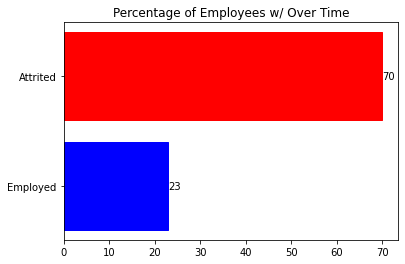

TypeError: proportions_pval() missing 1 required positional argument: 'n2'

In [10]:

def bar_chart_prop(empl_pop: pd.DataFrame, attr_pop: pd.DataFrame, colname: str) -> None:
    attr_prop = attr_pop[colname].value_counts()['Yes'] / attr_pop[colname].shape[0]
    empl_prop = empl_pop[colname].value_counts()['Yes'] / empl_pop[colname].shape[0]
    
    attr_prop = round(attr_prop, 2) * 100
    empl_prop = round(empl_prop, 2) * 100
    
    y = ['Employed', 'Attrited']
    x = [empl_prop, attr_prop]
    
    fig, ax = plt.subplots()
    bars = ax.barh(y, x)

    ax.bar_label(bars)
    bars[0].set_color('b')
    bars[1].set_color('r')
    
    # plt.xlabel('Percentage of Employees w/ Over Time')
    plt.title(f'Percentage of Employees w/ Over Time')
    
    # print(_title('bar chart'))
    plt.show()

colname = 'OverTime'
bar_chart_prop(empl_pop, attr_pop, colname)




pval = utils.proportions_pval(empl_sample, attr_sample, colname)
utils.print_significance(pval, cohens)

# Attrition by Shift Worked

0    568
1    642
2    179
3     88
Name: Shift, dtype: int64
0    140
1     42
2      6
3     11
Name: Shift, dtype: int64


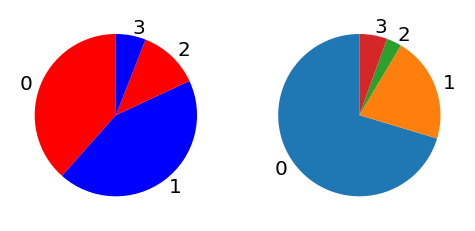

In [11]:
colname = 'Shift'
utils.pie_chart(empl_pop, attr_pop, colname)

In [11]:
sr = pd.Series([1, 1, 1, 1, 2, 2, 3, 3, 3, 3])
print(sr.value_counts()[2])

2
